In [1]:
pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bone_marrow_transplant_children = fetch_ucirepo(id=565)


X = bone_marrow_transplant_children.data.features
y = bone_marrow_transplant_children.data.targets


print(bone_marrow_transplant_children.metadata)

print(bone_marrow_transplant_children.variables)


{'uci_id': 565, 'name': 'Bone marrow transplant: children', 'repository_url': 'https://archive.ics.uci.edu/dataset/565/bone+marrow+transplant+children', 'data_url': 'https://archive.ics.uci.edu/static/public/565/data.csv', 'abstract': 'The data set describes pediatric patients with several hematologic diseases, who were subject to the unmanipulated allogeneic unrelated donor hematopoietic stem cell transplantation.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 187, 'num_features': 36, 'feature_types': ['Integer', 'Real'], 'demographics': ['Gender', 'Age'], 'target_col': ['survival_status'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5NP6Z', 'creators': ['Marek Sikora', 'Łukasz Wróbel', 'Adam Gudyś'], 'intro_paper': {'ID': 293, 'type': 'NATIVE', 'title': 'GuideR: a guided se

In [7]:
# Merge features + target for easier EDA
df = pd.concat([X, y], axis=1)

In [8]:
# --- 3. Basic overview ---
print("Shape:", df.shape)

Shape: (187, 37)


In [11]:
print("\nInfo:\n")
df.info()


Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recipientgender       187 non-null    int64  
 1   Stemcellsource        187 non-null    int64  
 2   Donorage              187 non-null    float64
 3   Donorage35            187 non-null    int64  
 4   IIIV                  187 non-null    int64  
 5   Gendermatch           187 non-null    int64  
 6   DonorABO              187 non-null    int64  
 7   RecipientABO          186 non-null    float64
 8   RecipientRh           185 non-null    float64
 9   ABOmatch              186 non-null    float64
 10  CMVstatus             171 non-null    float64
 11  DonorCMV              185 non-null    float64
 12  RecipientCMV          173 non-null    float64
 13  Disease               187 non-null    object 
 14  Riskgroup             187 non-null    int64  
 15  Txpostrelapse  

In [12]:
print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False))


Missing values:
 extcGvHD                31
CMVstatus               16
RecipientCMV            14
CD3dCD34                 5
CD3dkgx10d8              5
RecipientRh              2
Rbodymass                2
DonorCMV                 2
RecipientABO             1
Allele                   1
ABOmatch                 1
Antigen                  1
Recipientgender          0
IIIV                     0
Donorage35               0
Donorage                 0
Stemcellsource           0
DonorABO                 0
Gendermatch              0
Disease                  0
Riskgroup                0
HLAmatch                 0
HLAmismatch              0
Txpostrelapse            0
Diseasegroup             0
Recipientageint          0
HLAgrI                   0
Recipientage10           0
Recipientage             0
CD34kgx10d6              0
aGvHDIIIIV               0
Relapse                  0
ANCrecovery              0
PLTrecovery              0
time_to_aGvHD_III_IV     0
survival_time            0
survival_s

In [13]:
print("\nSummary stats:\n", df.describe(include="all"))


Summary stats:
         Recipientgender  Stemcellsource    Donorage  Donorage35        IIIV  \
count        187.000000      187.000000  187.000000  187.000000  187.000000   
unique              NaN             NaN         NaN         NaN         NaN   
top                 NaN             NaN         NaN         NaN         NaN   
freq                NaN             NaN         NaN         NaN         NaN   
mean           0.598930        0.775401   33.472068    0.443850    0.598930   
std            0.491431        0.418438    8.271826    0.498171    0.491431   
min            0.000000        0.000000   18.646575    0.000000    0.000000   
25%            0.000000        1.000000   27.039726    0.000000    0.000000   
50%            1.000000        1.000000   33.550685    0.000000    1.000000   
75%            1.000000        1.000000   40.117809    1.000000    1.000000   
max            1.000000        1.000000   55.553425    1.000000    1.000000   

        Gendermatch    DonorABO  R

In [39]:
# --- 4. Univariate analysis ---
# Numeric feature distributions
numeric_features = [
    "Donorage",
    "Recipientage",
    "Rbodymass",
    "CD34kgx10d6",
    "CD3dkgx10d8",
    "CD3dCD34","survival_time"
]
# "ANCrecovery","PLTrecovery","time_to_aGvHD_III_IV"
df_numeric = df[numeric_features]

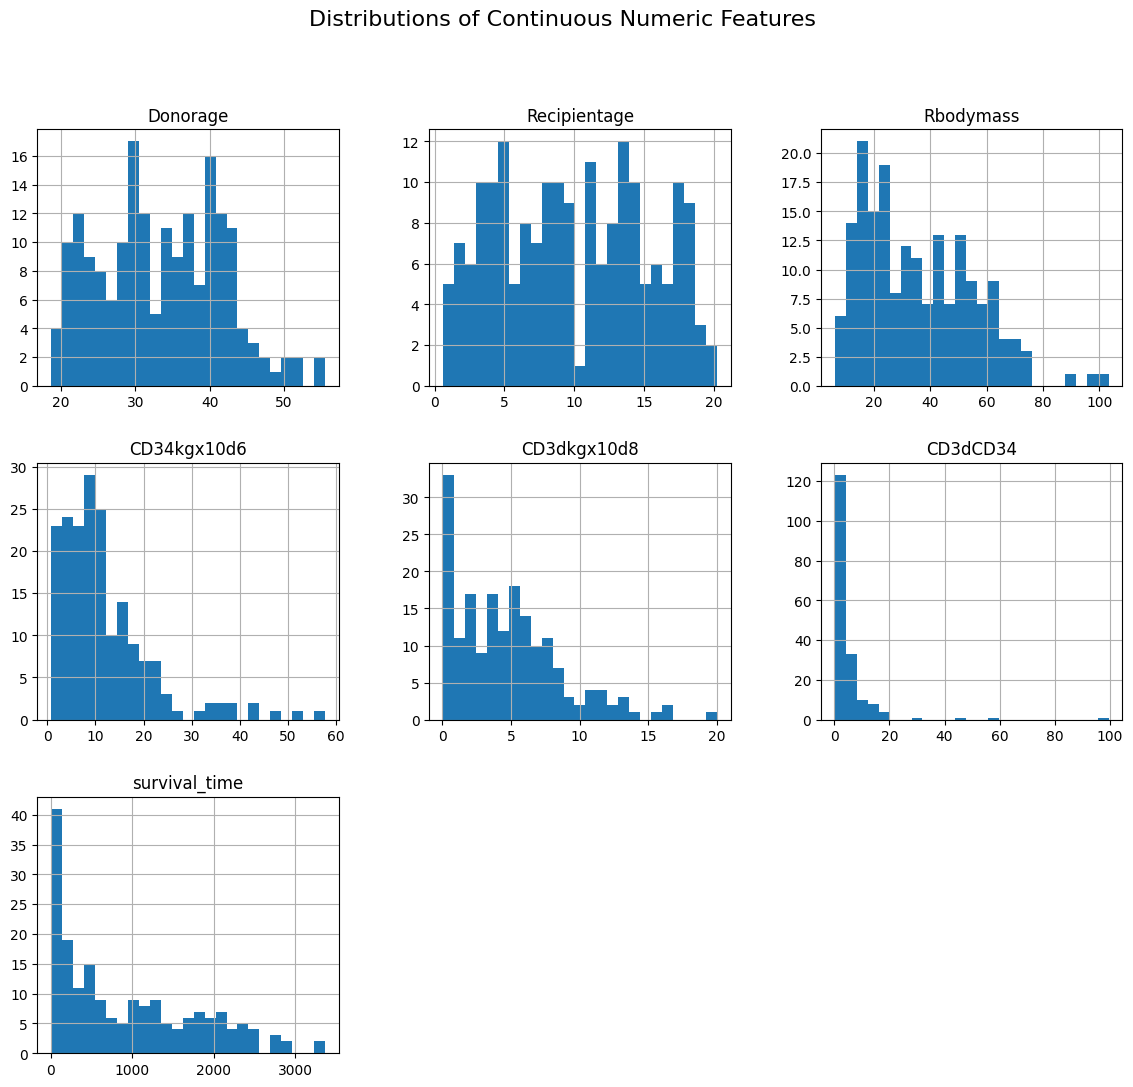

In [40]:
# Plot histograms for continuous numeric features
df_numeric.hist(figsize=(14, 12), bins=25)
plt.suptitle("Distributions of Continuous Numeric Features", fontsize=16)
plt.show()

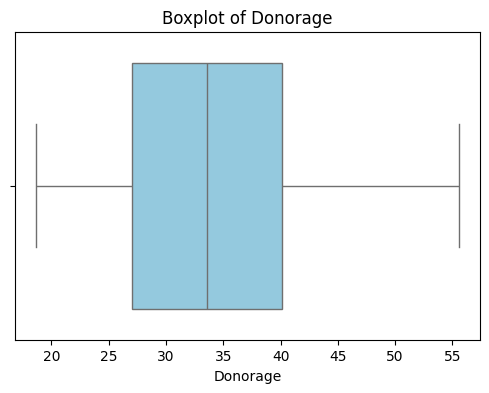

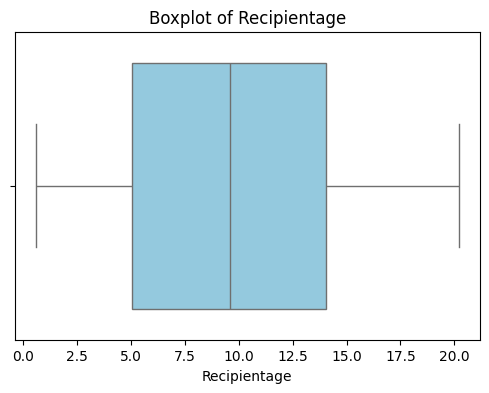

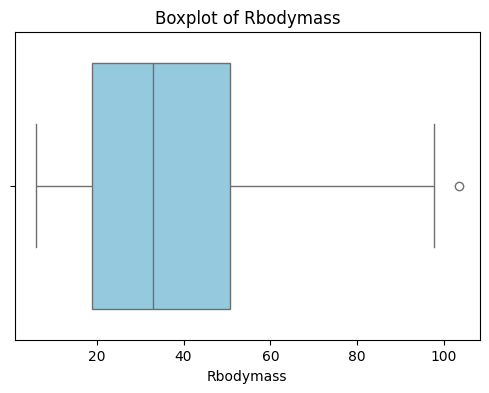

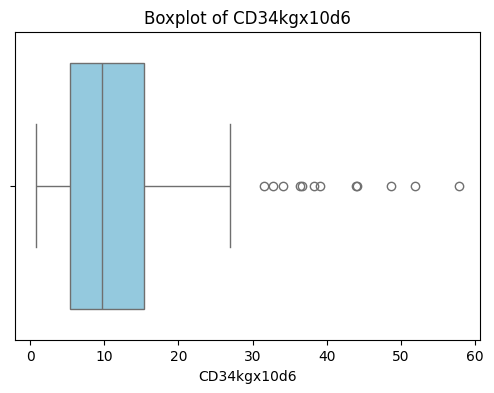

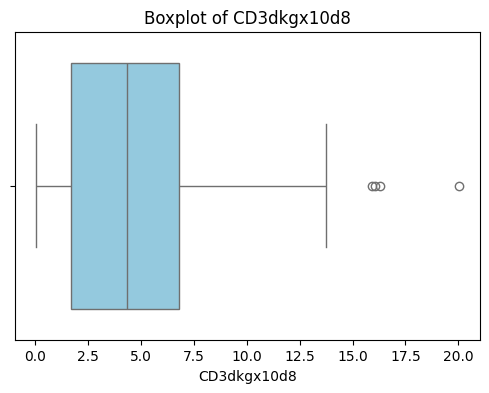

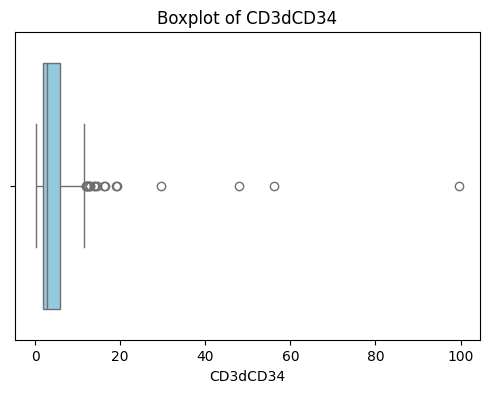

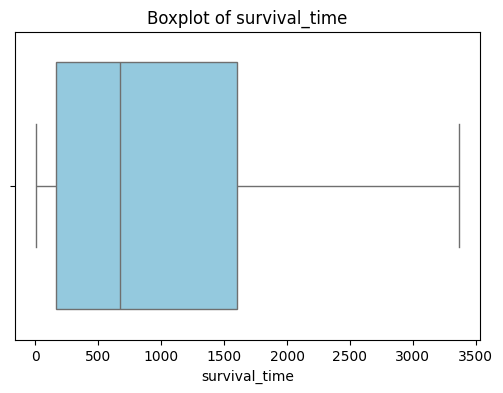

In [41]:
# Boxplots for numeric features
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


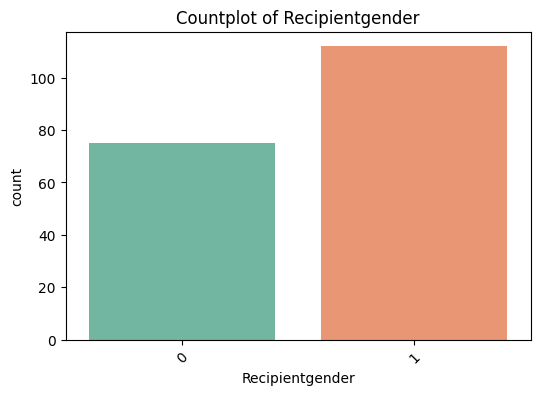

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


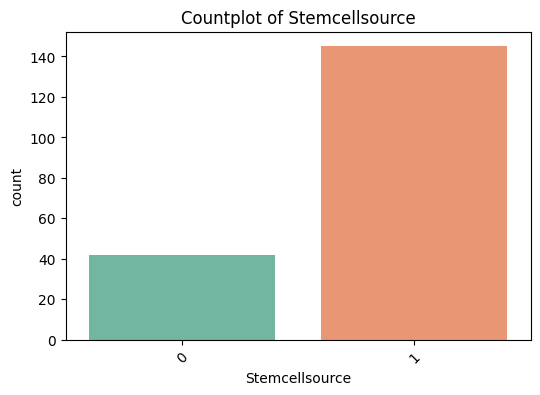

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


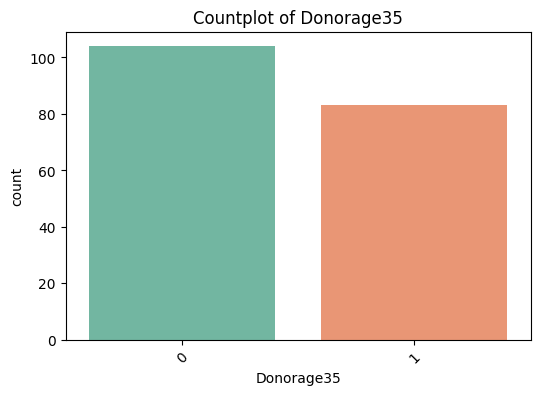

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


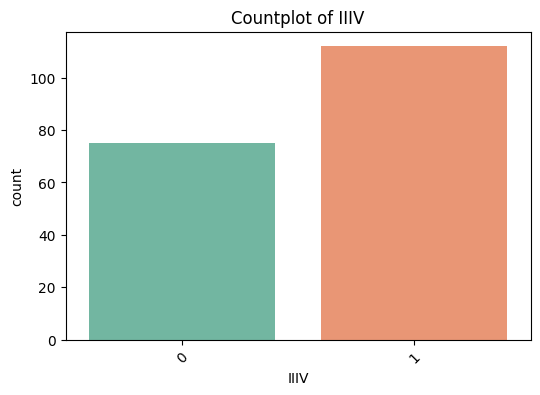

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


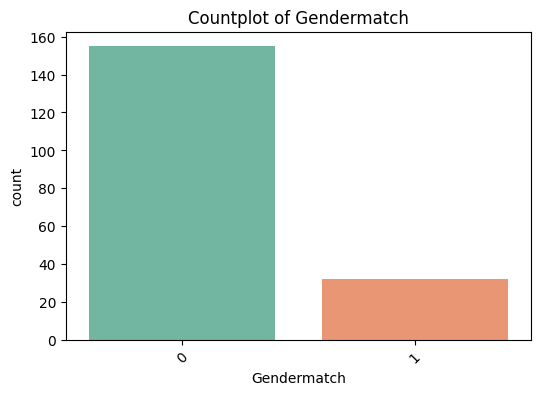

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


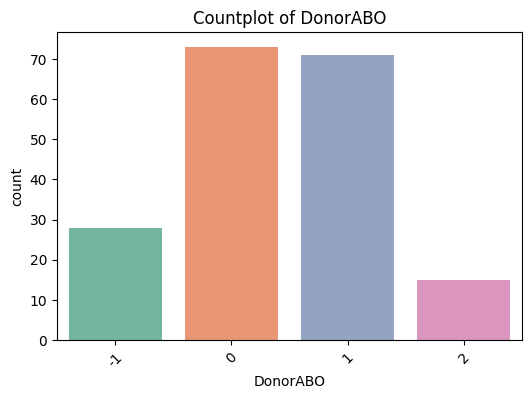

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


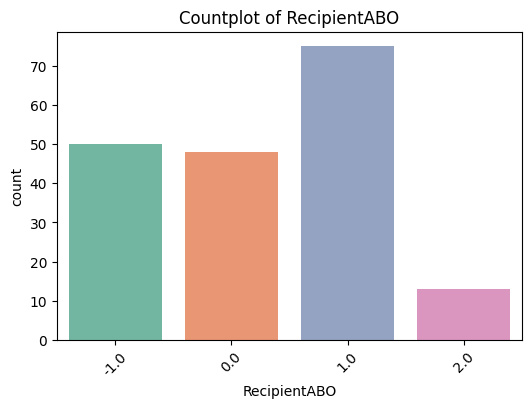

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


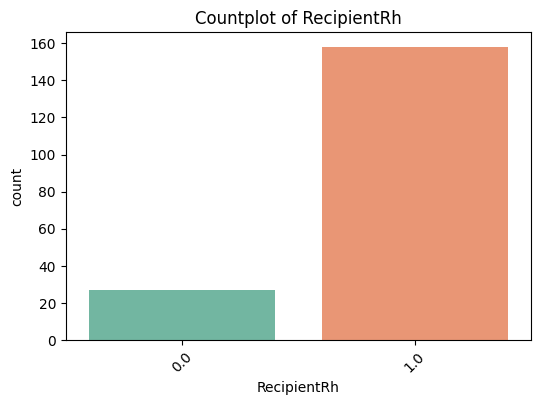

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


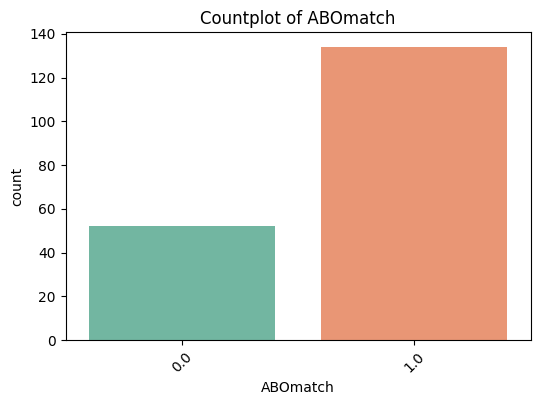

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


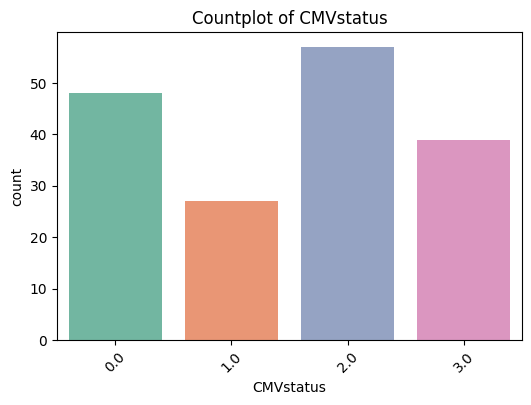

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


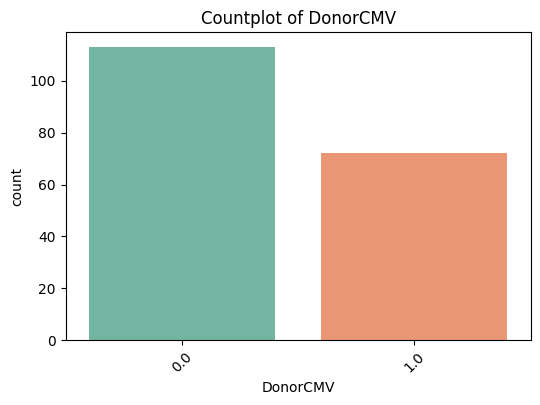

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


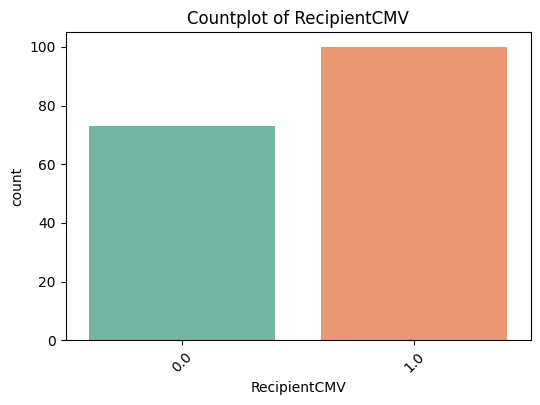

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


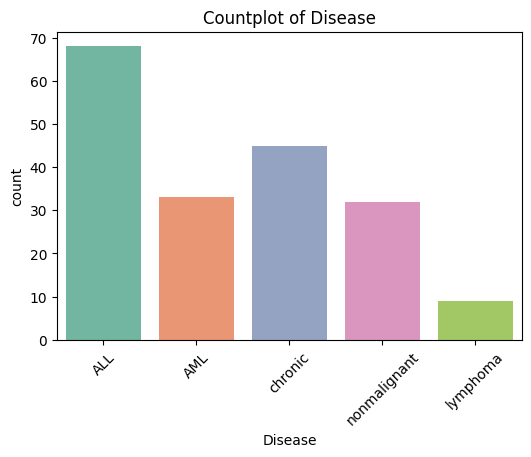

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


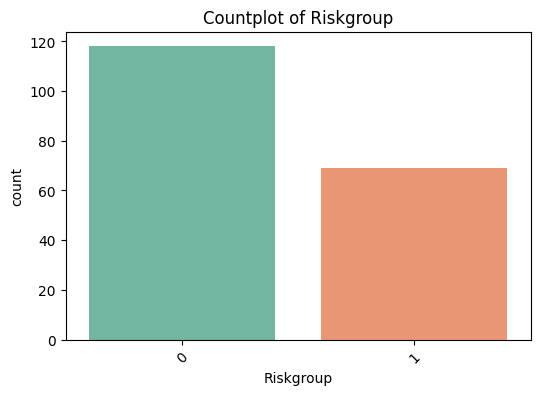

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


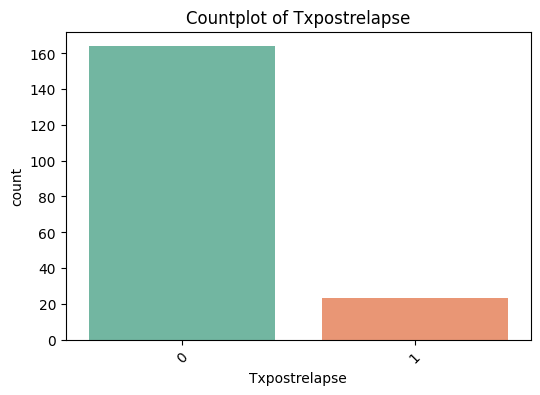

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


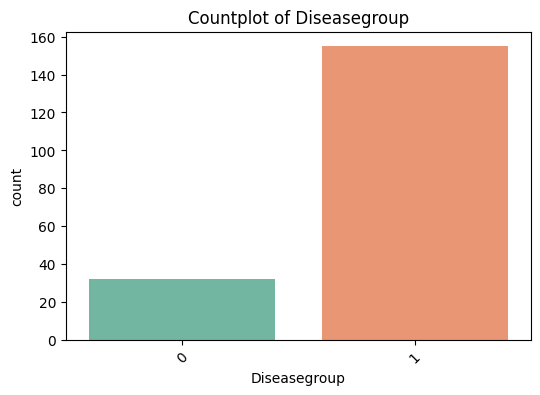

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


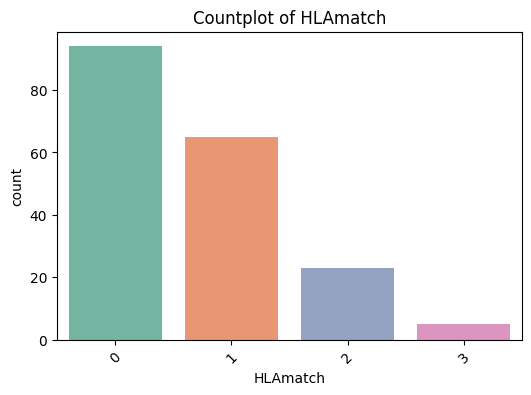

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


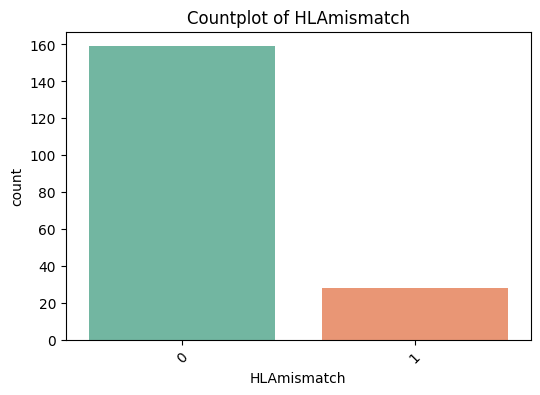

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


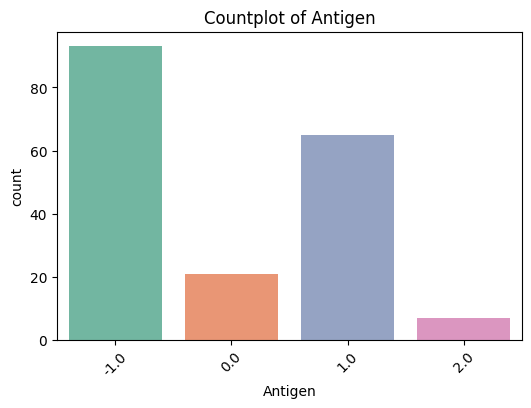

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


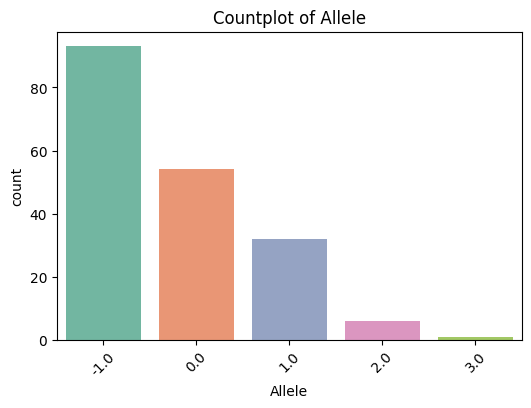

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


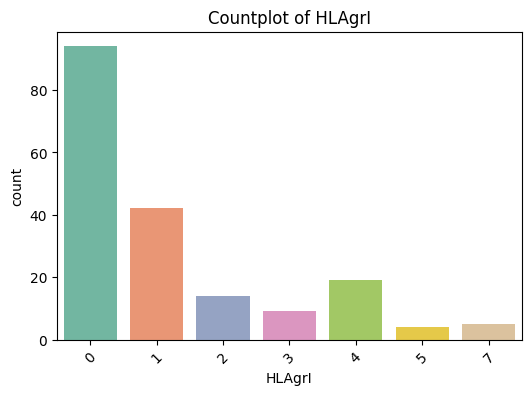

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


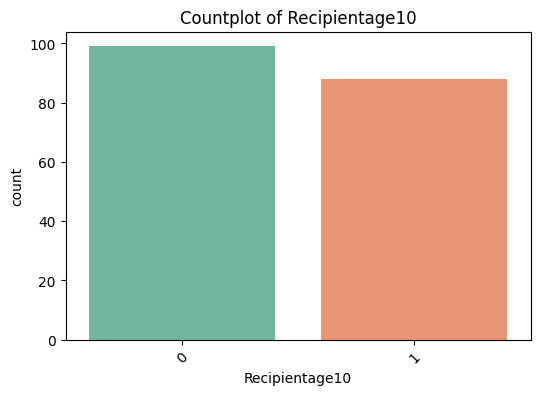

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


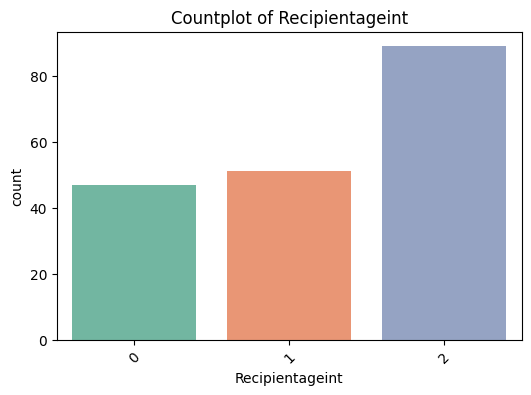

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


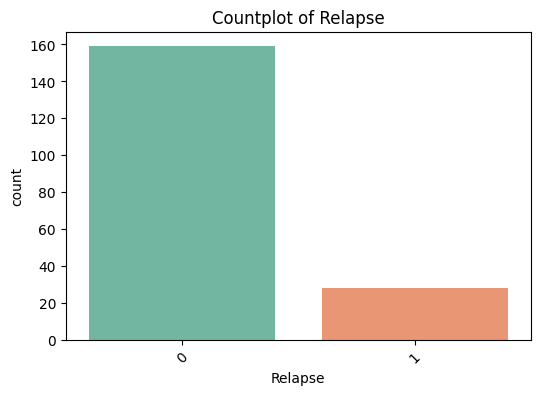

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


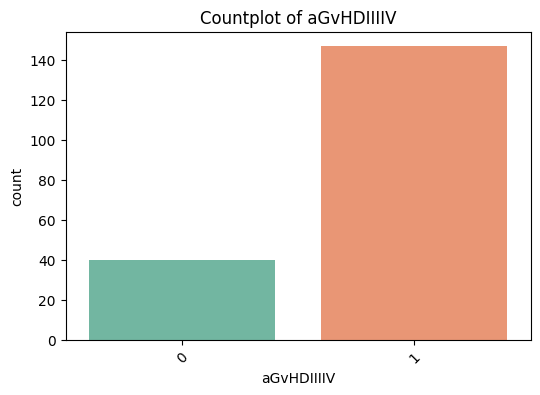

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


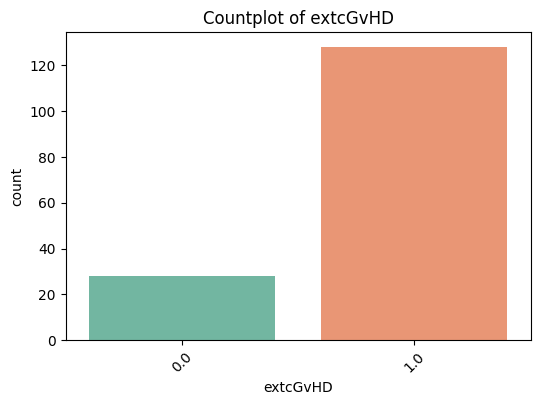

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


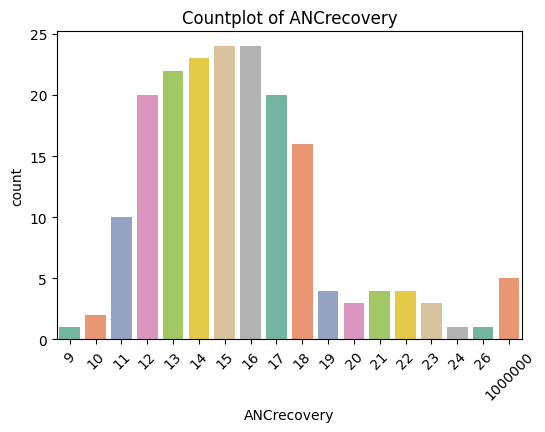

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


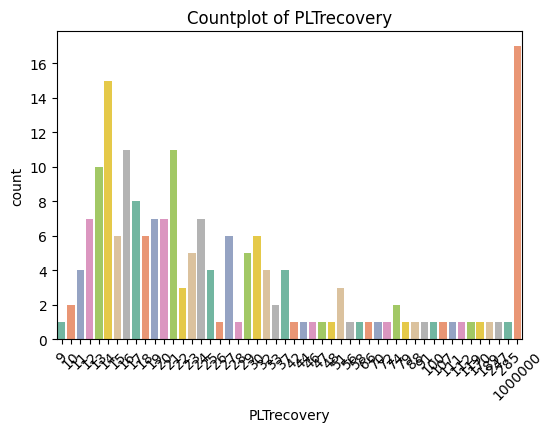

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


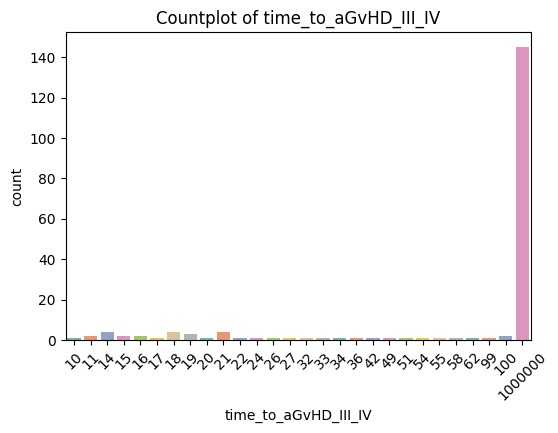

/tmp/ipython-input-2468618018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


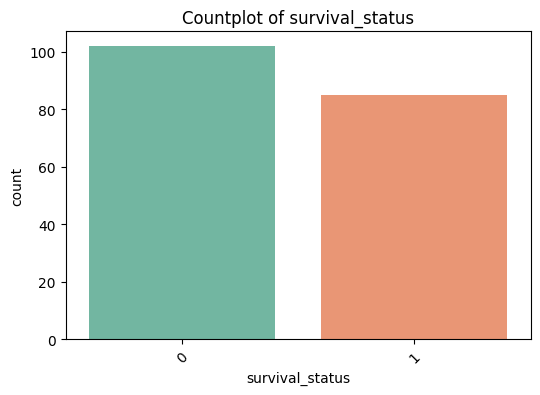

In [42]:
# Categorical distributions
categorical_features = [col for col in df.columns if col not in numeric_features]
# Countplots for categorical/binary features
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

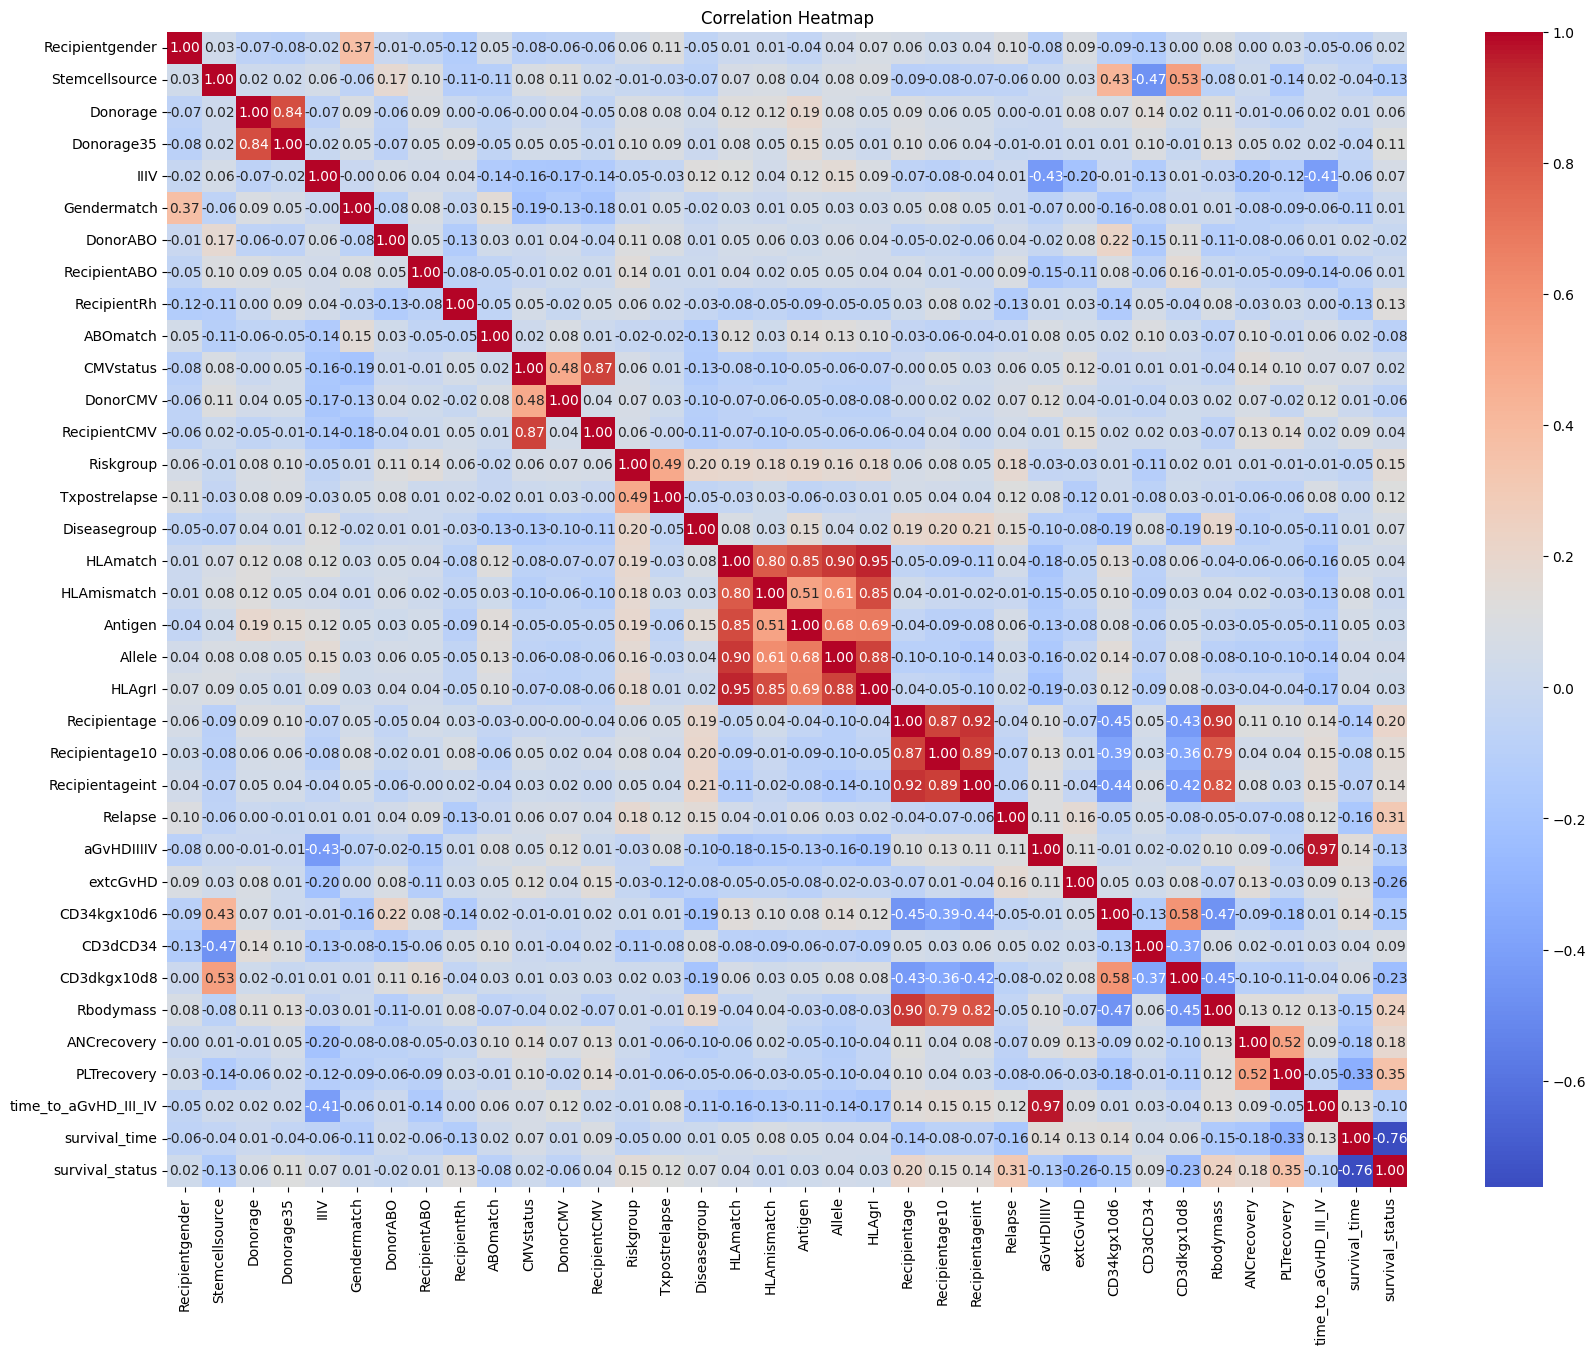

In [18]:
# --- 5. Correlation analysis ---
if len(num_cols) > 1:
    plt.figure(figsize=(20,15))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

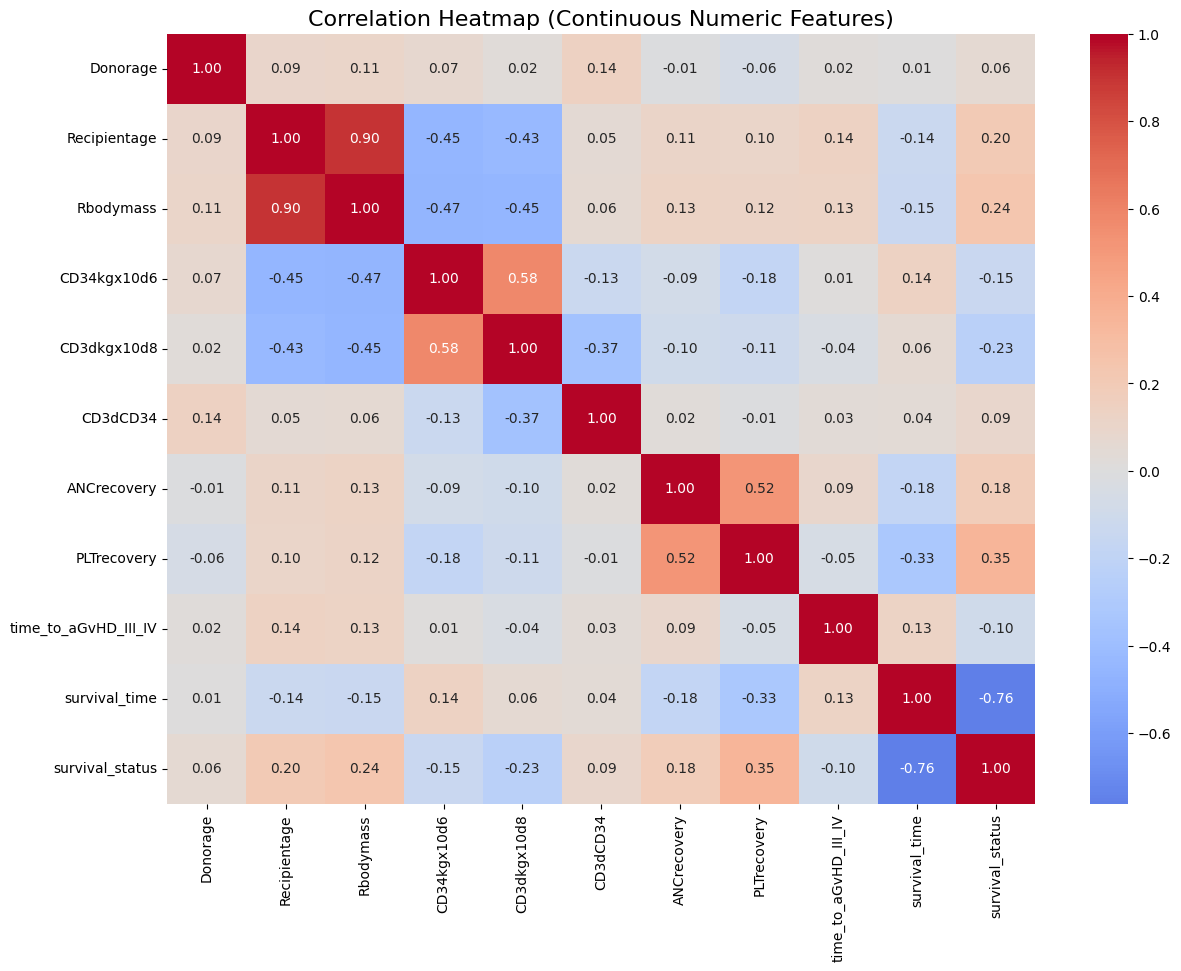

In [48]:
# Correlation analysis for numeric features
numeric_features_corr = [
    "Donorage",
    "Recipientage",
    "Rbodymass",
    "CD34kgx10d6",
    "CD3dkgx10d8",
    "CD3dCD34","ANCrecovery","PLTrecovery","time_to_aGvHD_III_IV" ,"survival_time", "survival_status"
]

df_corr_num = df[numeric_features_corr]
plt.figure(figsize=(14,10))
corr_matrix = df_corr_num.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap (Continuous Numeric Features)", fontsize=16)
plt.show()

In [19]:
#  6. Example bivariate analysis
# Adjust target column name depending on dataset
target_col = y.columns[0] if len(y.columns) > 0 else None

if target_col and "Age" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=target_col, y="Age", palette="Set3")
    plt.title(f"Age vs {target_col}")
    plt.show()

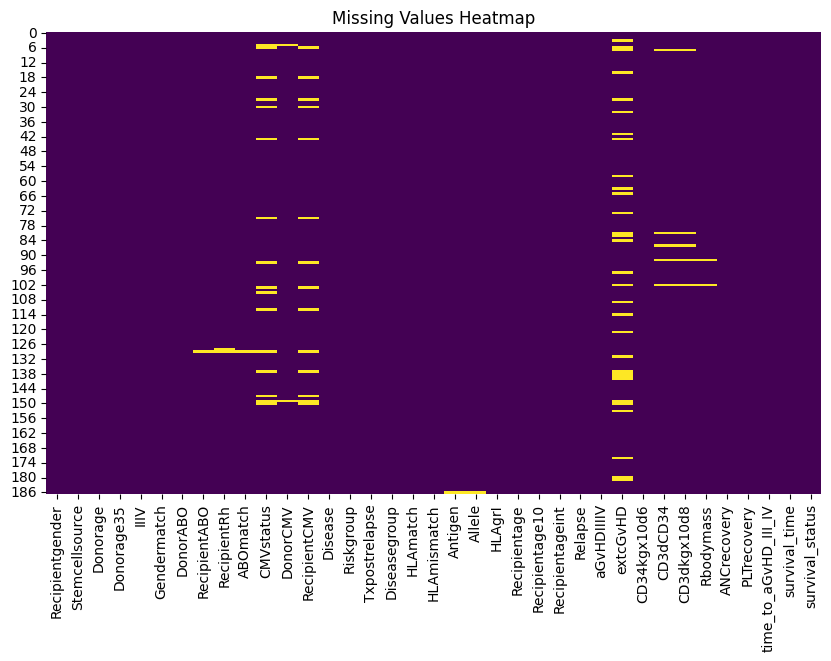

In [20]:
# --- 7. Missing values heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()